# 11-experiment-three-cogsci

## Analysis

In [6]:
# Analytical Tools
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# General Utilities
import itertools
import json
import pprint

# Custom Utilities
import utilities.plotting as plotting
import utilities.describe as describe

# Some settings
log = pprint.pprint
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.options.mode.chained_assignment = None

### Import Data & Define Constants

In [7]:
GROUPS = 3
QUESTIONS = 4
JUDGMENTS = 4
SCORE_THRESHOLD = 240.9

data = pd.read_pickle('data/responses.pkl')
data.head()

,id,consent,attention,g0_q0_score,g0_q0_index,g0_q0_j0,g0_q0_j1,g0_q0_j2,g0_q0_j3,g0_q1_score,...,g2_q2_j2,g2_q2_j3,g2_q3_score,g2_q3_index,g2_q3_j0,g2_q3_j1,g2_q3_j2,g2_q3_j3,j_mean,j_std
0,hu18z57qr2ja4v6jh24c57fk0b5ftdqs,1,1,22,35,5,1,0,1,27,...,5,2,2395,36,4,0,3,3,3.166667,1.837359
1,xev0ec5nfz6bfwq1h4puuscnk0eg8ck8,1,1,40,18,3,0,2,1,28,...,3,3,2416,2,3,2,3,4,2.354167,1.081559
2,upfop1hxok2r4hynbr5yfwty3q5628wr,1,1,28,2,5,0,5,2,19,...,1,2,2404,40,1,2,4,3,2.791667,1.687984
3,goxzca1lx6vlbzmf9la861fhqlmtxlmn,1,1,32,27,4,2,4,3,41,...,4,3,2398,16,2,1,2,2,2.854167,1.414057
4,j06j83a97loyc5won1rk9hg46qrwnzbs,1,1,24,10,6,0,2,3,22,...,1,0,2388,8,4,0,4,1,2.583333,2.220153


### Analysis

In [8]:
for g_num in range(GROUPS):
    for j_num in range(JUDGMENTS):
        headings = []
        for q_num in range(QUESTIONS):
            headings.append('g{}_q{}_j{}'.format(g_num, q_num, j_num))
        
        rating_mean = data[headings].mean(axis=1)
        data['g{}_j{}_mean'.format(g_num, j_num)] = rating_mean

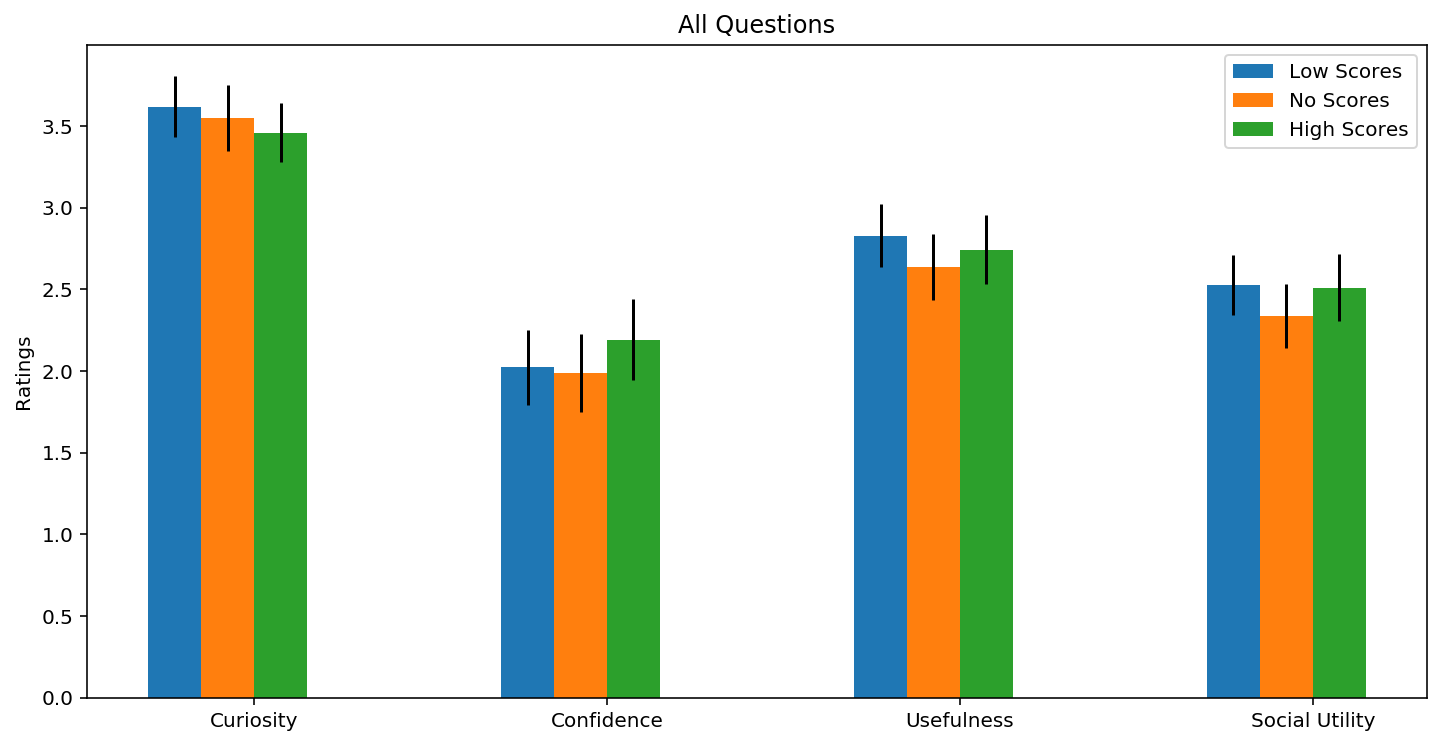

[3.6193181818181817, 2.022727272727273, 2.8295454545454546, 2.528409090909091]
[3.5511363636363638, 1.9886363636363635, 2.6363636363636362, 2.335227272727273]
[3.460227272727273, 2.1931818181818183, 2.7443181818181817, 2.5113636363636362]


In [12]:
PLOTTING_OPTIONS = {
    'ylabel': 'Ratings',
    'ticks': ['Curiosity', 'Confidence', 'Usefulness','Social Utility'],
    'legend': ['Low Scores', 'No Scores', 'High Scores'],
    'title': 'All Questions',
    'size': (12, 6)
}

g0_means, g0_errs = [], []
g1_means, g1_errs = [], []
g2_means, g2_errs = [], []

for j_num in range(JUDGMENTS):
    g0_values = data['g0_j{}_mean'.format(j_num)]
    g1_values = data['g1_j{}_mean'.format(j_num)]
    g2_values = data['g2_j{}_mean'.format(j_num)]
    g0_means.append(g0_values.mean())
    g1_means.append(g1_values.mean())
    g2_means.append(g2_values.mean())
    g0_errs.append(stats.sem(g0_values))
    g1_errs.append(stats.sem(g1_values))
    g2_errs.append(stats.sem(g2_values))
    
plotting.plot_triple_bar(g0_means, g0_errs, g1_means, g1_errs, 
                         g2_means, g2_errs, **PLOTTING_OPTIONS)

print(g0_means)
print(g1_means)
print(g2_means)

In [13]:
print('Low & High')
for j_num in range(JUDGMENTS):
    g0_values = data['g0_j{}_mean'.format(j_num)]
    g2_values = data['g2_j{}_mean'.format(j_num)]
    print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                          describe.paired_t_test(g0_values, g2_values)))
print()
print('Low & None')
for j_num in range(JUDGMENTS):
    g0_values = data['g0_j{}_mean'.format(j_num)]
    g2_values = data['g1_j{}_mean'.format(j_num)]
    print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                          describe.paired_t_test(g0_values, g2_values)))
print()
print('None & High')
for j_num in range(JUDGMENTS):
    g0_values = data['g1_j{}_mean'.format(j_num)]
    g2_values = data['g2_j{}_mean'.format(j_num)]
    print('{}: {}'.format(PLOTTING_OPTIONS['ticks'][j_num],
                          describe.paired_t_test(g0_values, g2_values)))

Low & High
Curiosity: t = 0.831, p = 0.411, Δ = -0.159 (0 greater)
Confidence: t = -1.03, p = 0.308, Δ = 0.17 (1 greater)
Usefulness: t = 0.418, p = 0.678, Δ = -0.0852 (0 greater)
Social Utility: t = 0.114, p = 0.91, Δ = -0.017 (0 greater)

Low & None
Curiosity: t = 0.456, p = 0.651, Δ = -0.0682 (0 greater)
Confidence: t = 0.199, p = 0.843, Δ = -0.0341 (0 greater)
Usefulness: t = 1.26, p = 0.214, Δ = -0.193 (0 greater)
Social Utility: t = 1.7, p = 0.0959, Δ = -0.193 (0 greater)

None & High
Curiosity: t = 0.599, p = 0.553, Δ = -0.0909 (0 greater)
Confidence: t = -1.27, p = 0.211, Δ = 0.205 (1 greater)
Usefulness: t = -0.666, p = 0.509, Δ = 0.108 (1 greater)
Social Utility: t = -1.17, p = 0.248, Δ = 0.176 (1 greater)
